## Bankruptcy Prediction

Given *financial client data*, let's try to predict whether a given client will go **bankrupt** or not.

We will use a variety of classification models to make our predictions.

Data source: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

### Getting Started

In [7]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore')

In [8]:
data = pd.read_csv('archive/data.csv')
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [6]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
{column: len(data[column].unique()) for column in data.columns}

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 3333,
 ' ROA(A) before interest and % after tax': 3151,
 ' ROA(B) before interest and depreciation after tax': 3160,
 ' Operating Gross Margin': 3781,
 ' Realized Sales Gross Margin': 3788,
 ' Operating Profit Rate': 3376,
 ' Pre-tax net Interest Rate': 3789,
 ' After-tax net Interest Rate': 3604,
 ' Non-industry income and expenditure/revenue': 2551,
 ' Continuous interest rate (after tax)': 3617,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1536,
 ' Cash flow rate': 5557,
 ' Interest-bearing debt interest rate': 1080,
 ' Tax rate (A)': 2488,
 ' Net Value Per Share (B)': 2278,
 ' Net Value Per Share (A)': 2285,
 ' Net Value Per Share (C)': 2284,
 ' Persistent EPS in the Last Four Seasons': 1358,
 ' Cash Flow Per Share': 1545,
 ' Revenue Per Share (Yuan ¥)': 3807,
 ' Operating Profit Per Share (Yuan ¥)': 1236,
 ' Per Share Net profit before tax (Yuan ¥)': 1522,
 ' Realized Sale

### Preprocessing

In [11]:
# Drop single value column
data = data.drop(' Net Income Flag', axis=1)
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.1900

In [12]:
# Split data into X and y
y = data['Bankrupt?']
X = data.drop('Bankrupt?', axis=1)

In [13]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [15]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [16]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
3392,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,-0.193823
2755,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.172557,-0.268783,-0.3

In [17]:
X_train.var()

ROA(C) before interest and depreciation before interest    1.00021
ROA(A) before interest and % after tax                     1.00021
ROA(B) before interest and depreciation after tax          1.00021
Operating Gross Margin                                     1.00021
Realized Sales Gross Margin                                1.00021
                                                            ...   
Net Income to Stockholder's Equity                         1.00021
Liability to Equity                                        1.00021
Degree of Financial Leverage (DFL)                         1.00021
Interest Coverage Ratio (Interest expense to EBIT)         1.00021
Equity to Liability                                        1.00021
Length: 94, dtype: float64

In [18]:
X_test.mean()

ROA(C) before interest and depreciation before interest    0.031920
ROA(A) before interest and % after tax                     0.017739
ROA(B) before interest and depreciation after tax          0.034999
Operating Gross Margin                                    -0.017050
Realized Sales Gross Margin                               -0.017153
                                                             ...   
Net Income to Stockholder's Equity                        -0.007733
Liability to Equity                                        0.004539
Degree of Financial Leverage (DFL)                        -0.021056
Interest Coverage Ratio (Interest expense to EBIT)         0.037794
Equity to Liability                                        0.037224
Length: 94, dtype: float64

### Training (Original data)

In [19]:
original_models = {
    '                   Logistic Regression': LogisticRegression(),
    '                   K-Nearest Neighbors': KNeighborsClassifier(),
    '                         Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    '   Support Vector Machine (RBF Kernel)': SVC(),
    '                        Neural Network': MLPClassifier(),
    '                         Random Forest': RandomForestClassifier(),
    '                     Gradient Boosting': GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [20]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result*100))

                   Logistic Regression: 96.48%
                   K-Nearest Neighbors: 96.48%
                         Decision Tree: 95.36%
Support Vector Machine (Linear Kernel): 96.29%
   Support Vector Machine (RBF Kernel): 96.58%
                        Neural Network: 95.80%
                         Random Forest: 96.43%
                     Gradient Boosting: 96.14%


In [22]:
y_test.value_counts() / len(y_test)

Bankrupt?
0    0.965298
1    0.034702
Name: count, dtype: float64

### Dimensionality Reduction (PCA)

In [24]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
3392,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,-0.193823
2755,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.172557,-0.268783,-0.3

In [25]:
X_train.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03
mean,-8.924583e-16,-2.225563e-16,-1.351713e-15,8.775344e-15,-4.463036e-15,-8.098520e-14,-1.180888e-14,2.597322e-14,-3.094203e-15,-7.75

In [32]:
n_components = 10

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components+1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components+1)])

In [33]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
3392,-21.396971,-7.427836,10.384790,-16.385044,8.410605,-14.815803,1.072838,0.033075,2.402385,-2.696531
2755,0.537250,-0.632416,-1.522062,-0.059505,-0.892918,-0.115449,-0.166554,-0.332114,-0.642663,-0.422476
4442,3.777733,-0.482875,-1.127331,-0.334114,1.277027,-0.359205,-0.872919,-0.504780,-1.627089,-1.011487
4267,-3.117700,-0.669615,-1.191915,0.644932,-1.861750,-0.650279,-0.850108,-0.755383,-0.427210,-0.891521
4912,-0.849583,0.693095,1.479401,0.479007,-0.759656,-0.081183,0.799119,0.795359,1.014490,0.554192
...,...,...,...,...,...,...,...,...,...,...
905,-0.566135,-0.528486,-0.117570,0.415036,0.398719,-0.994780,0.124759,-0.550211,-0.998750,-0.220497
5192,2.253182,3.498919,4.647433,0.692899,-0.644921,-1.188225,0.218418,0.440967,0.685758,0.521140
3980,5.630039,0.346179,0.506075,-1.037802,2.011352,-0.591237,1.471390,-2.752388,0.435182,0.486154
235,-7.567250,-0.172520,-0.267939,0.819849,-0.230117,0.908622,-2.120545,0.029506,-0.316388,0.161774


In [34]:
X_train_reduced.var()

PC1     13.019877
PC2      7.111437
PC3      5.295304
PC4      5.019315
PC5      4.709648
PC6      3.248230
PC7      3.013946
PC8      2.249306
PC9      2.205260
PC10     2.089613
dtype: float64

In [35]:
pca.explained_variance_ratio_

array([0.13848031, 0.07563774, 0.05632122, 0.05338578, 0.05009214,
       0.0345484 , 0.03205653, 0.02392378, 0.0234553 , 0.02222527])

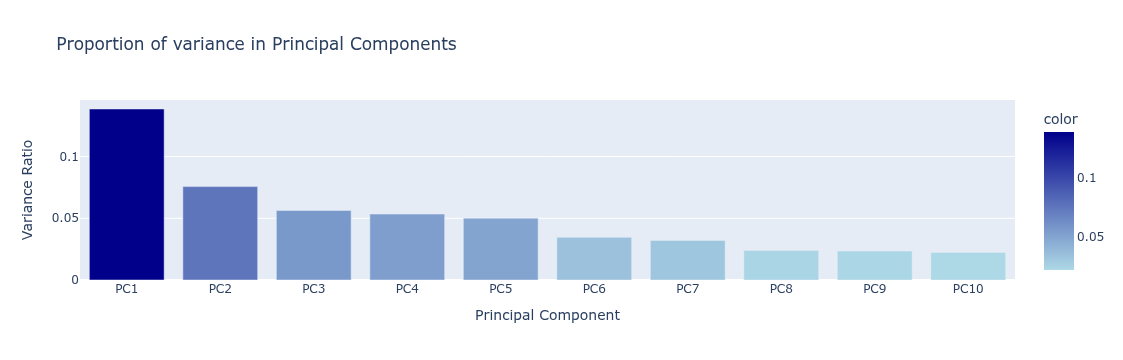

In [36]:
fig = px.bar(
    x = ['PC' + str(i) for i in range(1, n_components + 1)],
    y = pca.explained_variance_ratio_,
    labels = {'x': 'Principal Component', 'y': 'Variance Ratio'},
    color = pca.explained_variance_ratio_,
    color_continuous_scale = [(0, 'lightblue'), (1, 'darkblue')],
    title = 'Proportion of variance in Principal Components'
)
fig.show()

### Training (Reduced Data)

In [39]:
reduced_models = {
    '                   Logistic Regression': LogisticRegression(),
    '                   K-Nearest Neighbors': KNeighborsClassifier(),
    '                         Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    '   Support Vector Machine (RBF Kernel)': SVC(),
    '                        Neural Network': MLPClassifier(),
    '                         Random Forest': RandomForestClassifier(),
    '                     Gradient Boosting': GradientBoostingClassifier()
}

for name, model in reduced_models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [41]:
reduced_results = []

for name, model in reduced_models.items():
    result = model.score(X_test_reduced, y_test)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 96.24%
                   K-Nearest Neighbors: 96.29%
                         Decision Tree: 94.92%
Support Vector Machine (Linear Kernel): 96.48%
   Support Vector Machine (RBF Kernel): 96.63%
                        Neural Network: 96.33%
                         Random Forest: 96.58%
                     Gradient Boosting: 96.43%


### Change in Performance After PCA

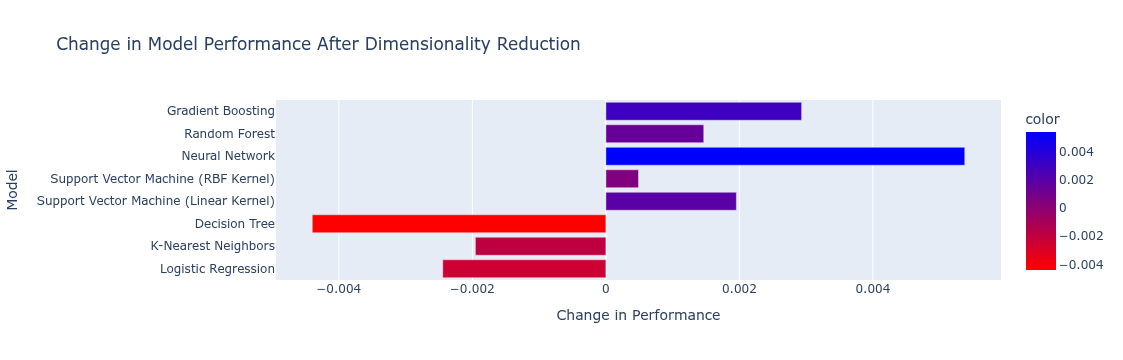

In [43]:
fig = px.bar(
    x = np.subtract(reduced_results, original_results),
    y = reduced_models.keys(),
    orientation = 'h',
    labels = {'x': 'Change in Performance', 'y': 'Model'},
    color = np.subtract(reduced_results, original_results),
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    title = "Change in Model Performance After Dimensionality Reduction"
)

fig.show()